In [ ]:
pip install pyaes

  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26363 sha256=6cf63e43d2105e32fc6b972441452dd2f3d38fd86852e1e4a98a8429104caeab
  Stored in directory: /root/.cache/pip/wheels/42/a3/7d/73d60820adb58d818179cdec3fc1be66f6f7453513a3ff0b05
Successfully built pyaes


ruta de la imagen?:aguila.jpg
Bits a utilizar? (128 (16 char),192 (24 char), 256(32 char)):256
Clave?:Esta_clave_tiene_32_bits_fijos_1
El texto cifrado es: b'nA8oTT5SkgYi6QAsUr182pKFfsaJ3U7B8AqjTIjDSvvKMLZ3fr3gyDixYBzasVAfFGEch84H2XGMlomt8wMTzj3OJ3Z5rPLXHngN70KInrXnKaP3qCQdHtRO16nnzlp29kewRcZkXJ/0ndo6uJ7d5aO339YAYcOrte/m9oYapauy5iScQYRsejcsohq+rDH0zvBaNXKdsIF8Njj9zFgwUamA/VMV1DbkL6ZCMmFSLskMMEDd8P9AMt+sr2DhzZ6nhNwmXoyXl2jvOUlw8q0KwkBRnPzsjvVHdauZQ5Fw8G0SFLRGZV7Y19kpD9eo1zBVnqjsj1sZiYg2EVcc/XSiu8G2/sb23oW7s9DiKLk98HkVeyfFkJtWf5DJPzJiSLwztA/asOokETAUuqXWVebUeVu9MDY9NiPR+R2QK5j6XPPNkif7R0K+NR9FuILGfjT8sH2vJyjanaETCFsJEWTsVvPcnGOmLHIw9BJ25K0yOUre54Q02hrnIFoMHVwgqDBKts/yI5+ndjFGMV49FoKrSwm+JMqgA3O3EclJ5guR+8+TAbhkuSE7og7/FjW9cjvKkHYrgc8dMlTlklO2BjSi5ToFy4nnKJnNACdxgQPK0dO3f8g4ATdYNe40HcUFqYhiHVaxk+6JOIcYr4U3OGF8oXU2eDrpVK3rSFR1rNMoS/bYT6GjRiVhO4DzoxckZ5zRLrQvZX78rT42sro7z8R5blpmxlyS8OiJhONcVljPb+uE75B0OeC/k+k8JasFLVtHwmkrhBvfMG2SXd5F5phMoKmaob/TtEbK3TQKo8JxBxR2WToWydPHPJI+0KRZe98pGWbSIp6r3E

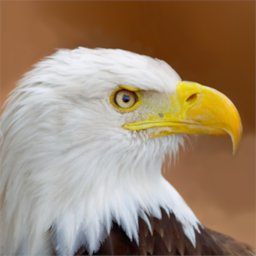

In [53]:
import pyaes
import cv2
import base64
import os
import io
import PIL.Image as Image
import numpy as np
from google.colab.patches import cv2_imshow #patch for cv2.imshow()

import pyaes

def aes_encrypt(plaintext, key):
    key = key.encode('utf-8')
    aes = pyaes.AESModeOfOperationCTR(key)
    ciphertext = aes.encrypt(plaintext)
    return base64.b64encode(ciphertext) 

def aes_decrypt(ciphertext, key):
    ciphertext = base64.b64decode(ciphertext)
    key = key.encode('utf-8')
    aes = pyaes.AESModeOfOperationCTR(key)
    plaintext = aes.decrypt(ciphertext)
    return plaintext

if __name__ == '__main__':
  imagepath = "aguila.jpg"

  imagepath = input('ruta de la imagen?:')

  key = "This_key_for_demo_purposes_only!"

  bits = input('Bits a utilizar? (128 (16 char),192 (24 char), 256(32 char)):')
  while bits != '128' and bits != '192' and bits != '256':
    bits = input('Numero no soportado, intente otra vez ') 
  totalbytes = int(bits)/8
  
  key = input("Clave?:")
  while len(key) != totalbytes:
    key = input('La longitud de la clave no es correcta')

  #se convierte la imagen a bytes, la libreria pyDes recibe bytes desde python3
  with open(imagepath, "rb") as image: 
    f = image.read()

  ciphertext = aes_encrypt(f,key)
  print('El texto cifrado es: ' + str(ciphertext))
  decrypted = aes_decrypt(ciphertext,key)
  print('El texto desencriptado es: '+str(decrypted))

  with open("salida.jpg", "wb") as binary_file:
    
    # Write bytes to file
    binary_file.write(decrypted)

  print('Imagen resultante: ')
  nparr = np.frombuffer(decrypted, np.uint8) 
  #imagen resultante del arreglo anterior
  img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR) 
  # cv2.imshow(img_np) es la funcion original, pero genera errores en colab
  cv2_imshow(img_np)

